## Multiple Regression Model
### MRM
this extended version of simple Regression model helps us to find the dependent value Y from multiple independent values like $x_{1} , x_{2} , ...$.

when *sales* process happens multiple factors are satisfied so when we consider sale of marketplace we look at factors like :

- marketing Expenses
- Our price
- competitor average price
- fixed Expenses

multiple regression models are visualized in 3-dimensions
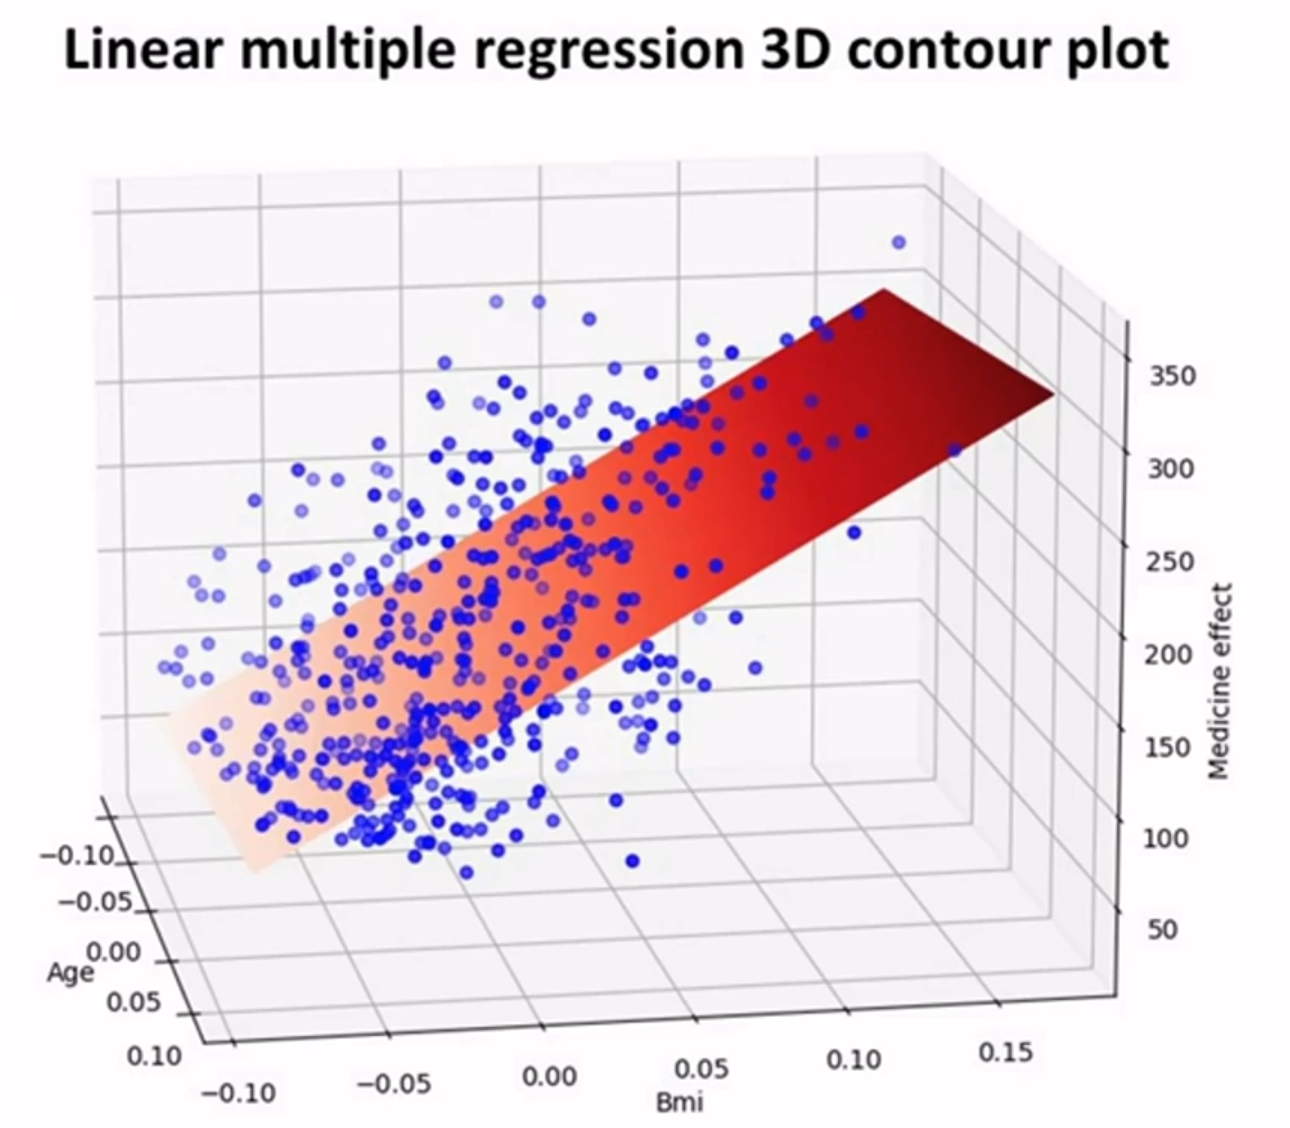

#### when we have more than three factors we visualize them two by two
#### for example when we have 6 regression factors we have 3 different type of visualizations 



In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('DiaB.csv')
df2 = df.copy()
print(df2.tail())


     Unnamed: 0       age       sex       bmi        bp        s1        s2  \
437         437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
438         438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
439         439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840   
440         440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
441         441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809   

           s3        s4        s5        s6  Target  
437 -0.028674 -0.002592  0.031193  0.007207   178.0  
438 -0.028674  0.034309 -0.018114  0.044485   104.0  
439 -0.024993 -0.011080 -0.046883  0.015491   132.0  
440 -0.028674  0.026560  0.044529 -0.025930   220.0  
441  0.173816 -0.039493 -0.004222  0.003064    57.0  


In [27]:
df2 = df2.drop('Unnamed: 0' , axis=1)



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


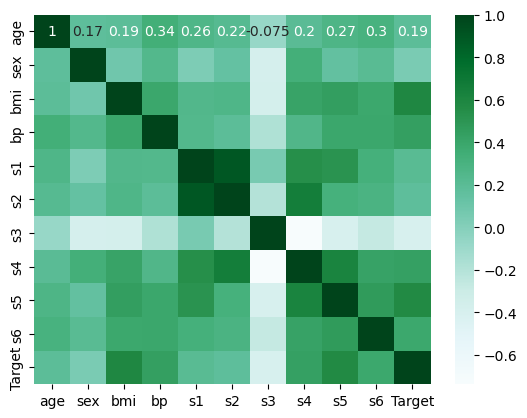

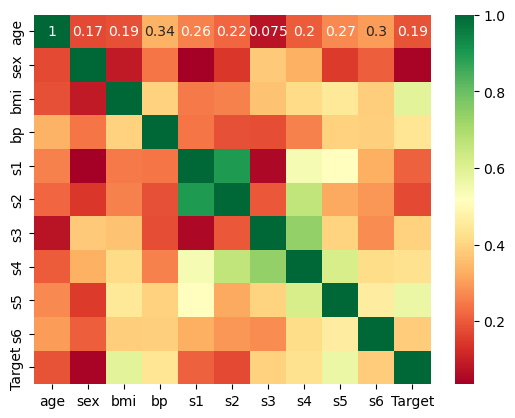

In [34]:

# we need to make a correlation matrix and visualize it
corr_matrix = df2.corr()
sns.heatmap(corr_matrix , annot = True  , cmap=plt.cm.BuGn) 
plt.show()

# one way to simpilify the heatmap when we have lot of factors is to calculate the absolute value 
# of them and make correlation analysis from them 
sns.heatmap(abs(corr_matrix)  , annot = True ,cmap=plt.cm.RdYlGn)
plt.show()



In [39]:
# we select the factors that are correlated with our target variable.
corr_tg = abs(corr_matrix['Target'])
rel_var = corr_tg[corr_tg>0.4]
rel_var = rel_var.sort_values(ascending=False)
print(rel_var)

Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
Name: Target, dtype: float64


In [64]:
X = df2[['bmi' , 's5' , 'bp' , 's4']]
X.insert(0 , 'Const' , 1)
Y = df2['Target']
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           5.41e-61
Time:                        22:38:00   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        152.1335      2.653     57.344      0.0

In [65]:
X = df2[['bmi' , 's5' , 'bp']]
X.insert(0 , 'Const' , 1)
Y = df2['Target']
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           7.16e-62
Time:                        22:39:49   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        152.1335      2.653     57.342      0.0

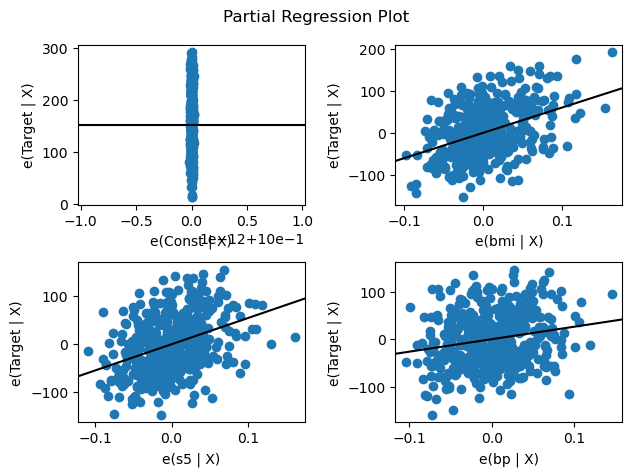

In [70]:
# stastsmodels residuals plots
import warnings 
warnings.simplefilter(action='ignore' , category= FutureWarning)
fig = sm.graphics.plot_partregress_grid(reg)
fig.tight_layout(pad=1.0)
plt.show()

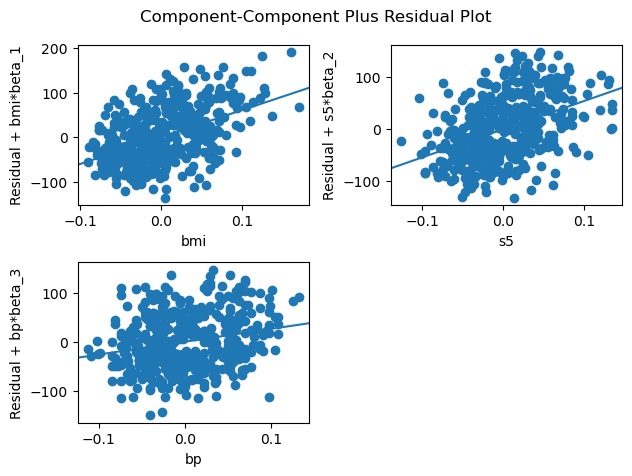

In [71]:
fig = sm.graphics.plot_ccpr_grid(reg)
fig.tight_layout(pad=1.0)
plt.show()

In [76]:
df2['Y pred'] = reg.predict()
df2['residuals'] = df2['Target'] - df2['Y pred']
std_res = df2['residuals'].std()
df2['std resi'] = df2['residuals'] / std_res
df2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target,Y pred,residuals,std resi
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,205.904754,-54.904754,-0.987706
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,77.022057,-2.022057,-0.036376
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,179.010040,-38.010040,-0.683780
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,147.866129,58.133871,1.045796
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,118.530022,16.469978,0.296286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,196.624801,-18.624801,-0.335050
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,114.948711,-10.948711,-0.196961
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,121.578274,10.421726,0.187481
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,200.227650,19.772350,0.355694


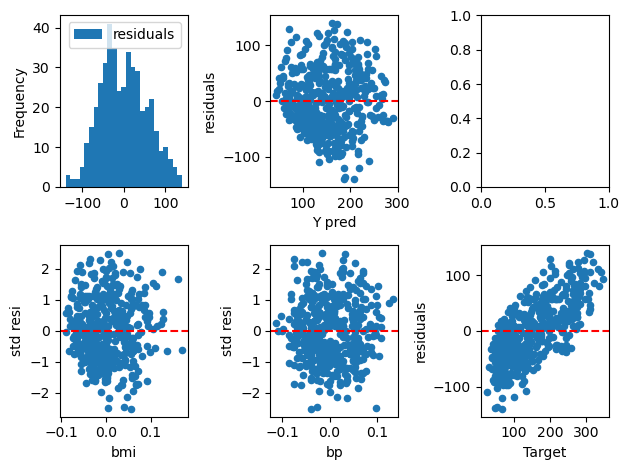

In [77]:
fig , ((hist1 , res_Y , res_bmi) , (res_Y3 , sres_X4 , sre_X5)) = plt.subplots(2,3)
df2.plot(y = 'residuals' , kind='hist' , bins=25 , ax=hist1)
df2.plot('Y pred' , 'residuals' ,kind='scatter' , ax=res_Y)
res_Y.axhline(y=0.0 , c='red' , linestyle='dashed')

df2.plot('bmi' , 'std resi' , kind='scatter' , ax=res_Y3)
res_Y3.axhline(y=0.0 , c='red' , linestyle='dashed')

df2.plot('bp' , 'std resi' , kind='scatter' , ax=sres_X4)
sres_X4.axhline(y=0.0 , c='red' , linestyle='dashed')

df2.plot('Target' , 'residuals' , kind='scatter' , ax=sre_X5)
sre_X5.axhline(y=0.0 , c='red' , linestyle='dashed')

fig.tight_layout()
plt.show()
